### 🔙 Volver al [Índice](./Indice_Tablas_Frecuencias.ipynb)

#  Datos cualitativos 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)  # Semilla diferente para variar los resultados
n = 500

# Categorías completamente aleatorias
categorias = ['Tipo A', 'Tipo B', 'Tipo C', 'Tipo D', 'Tipo E']

# Probabilidades aleatorias que suman 1
probs = np.random.dirichlet(np.ones(5), size=1)[0]

# Datos generados
datos = np.random.choice(categorias, size=n, p=probs)
df = pd.DataFrame(datos, columns=['Categoría'])

print("Primeras 10 observaciones:")
print(df.head(10))
print("\nProbabilidades generadas:", probs)

Primeras 10 observaciones:
  Categoría
0    Tipo C
1    Tipo E
2    Tipo E
3    Tipo D
4    Tipo B
5    Tipo B
6    Tipo E
7    Tipo C
8    Tipo A
9    Tipo C

Probabilidades generadas: [0.30894856 0.08734291 0.06666896 0.2076722  0.32936737]


## frecuencia absoluta

In [12]:
# Calculamos frecuencias
frec_abs = df['Categoría'].value_counts().reindex(categorias)
frec_rel = (frec_abs / n).round(4)
frec_abs_acum = frec_abs.cumsum()
frec_rel_acum = frec_rel.cumsum()

tabla_frec = pd.DataFrame({
    'Frec. Absoluta': frec_abs,
    'Frec. Relativa': frec_rel,
    'Frec. Abs. Acum.': frec_abs_acum,
    'Frec. Rel. Acum.': frec_rel_acum
})

print("Tabla de Frecuencias Completa:")
tabla_frec

Tabla de Frecuencias Completa:


,Frec. Absoluta,Frec. Relativa,Frec. Abs. Acum.,Frec. Rel. Acum.
Categoría,,,,
Tipo A,153,0.306,153,0.306
Tipo B,51,0.102,204,0.408
Tipo C,40,0.080,244,0.488
Tipo D,100,0.200,344,0.688
Tipo E,156,0.312,500,1.000


## frecuencia relativa

### De barras

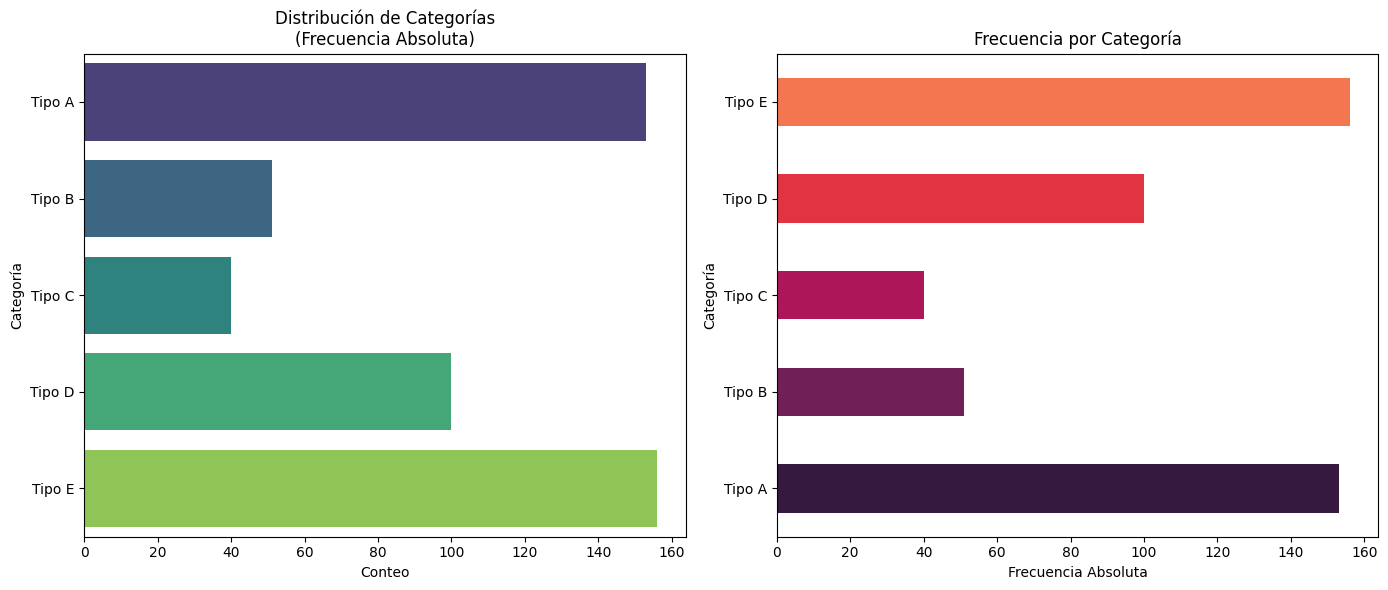

In [13]:
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.countplot(data=df, y='Categoría', order=categorias, palette='viridis')
plt.title('Distribución de Categorías\n(Frecuencia Absoluta)')
plt.xlabel('Conteo')

# Barras horizontales
plt.subplot(1, 2, 2)
frec_abs.plot(kind='barh', color=sns.color_palette('rocket'))
plt.title('Frecuencia por Categoría')
plt.xlabel('Frecuencia Absoluta')

plt.tight_layout()
plt.show()

### Poligono de freuencia y diagrama de pastel

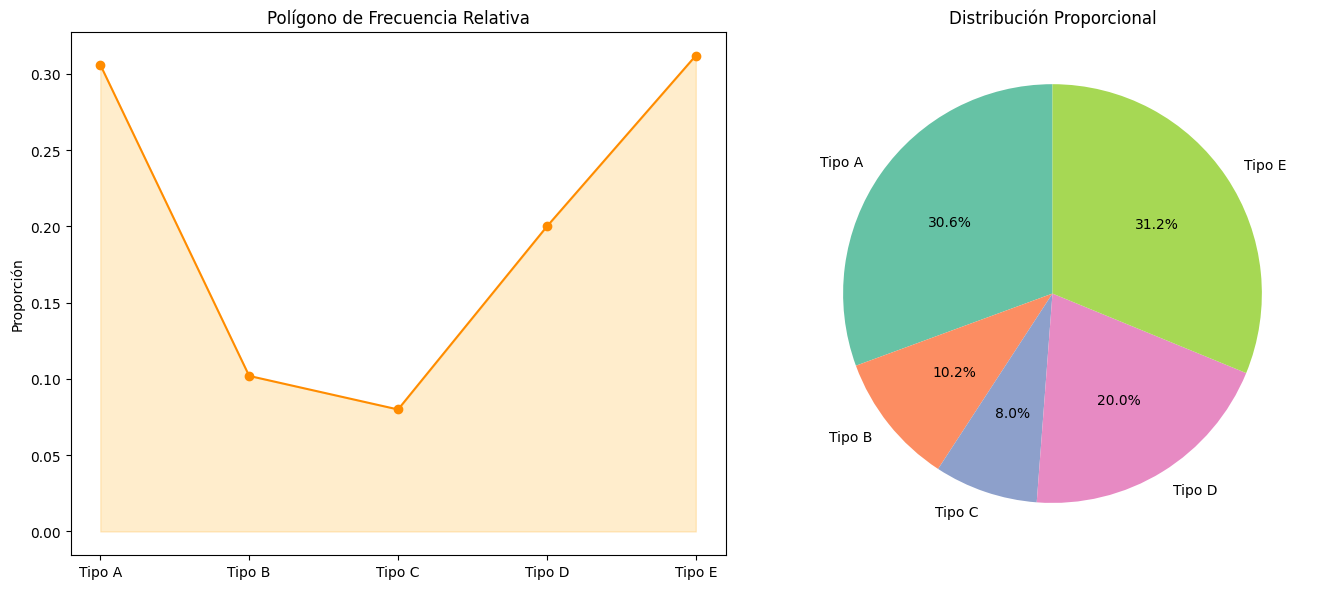

In [14]:
plt.figure(figsize=(14, 6))

# Polígono de frecuencia
plt.subplot(1, 2, 1)
plt.plot(frec_rel.index, frec_rel.values, 'o-', color='darkorange')
plt.fill_between(frec_rel.index, frec_rel.values, color='orange', alpha=0.2)
plt.title('Polígono de Frecuencia Relativa')
plt.ylabel('Proporción')

# Diagrama de pastel
plt.subplot(1, 2, 2)
plt.pie(frec_rel, labels=frec_rel.index, autopct='%1.1f%%', 
        colors=sns.color_palette('Set2'), startangle=90)
plt.title('Distribución Proporcional')

plt.tight_layout()
plt.show()

## frecuencia acumulada

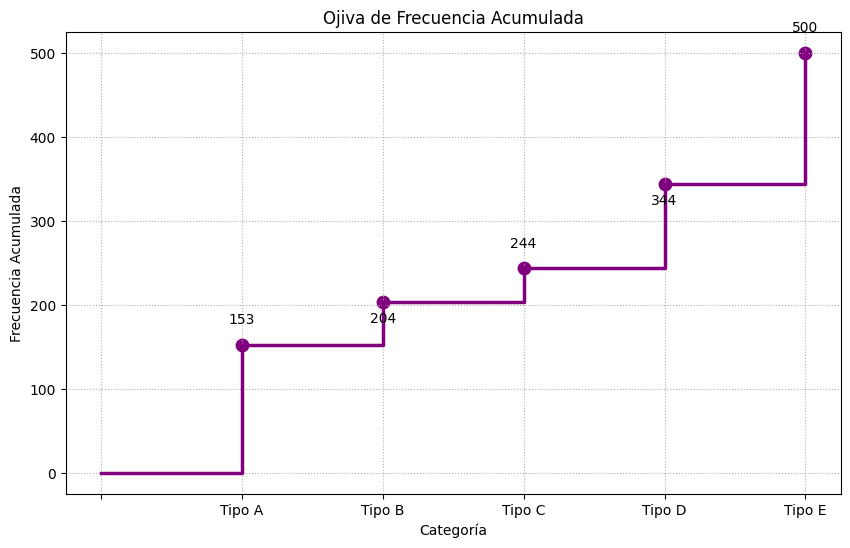

In [15]:
plt.figure(figsize=(10, 6))

plt.step([''] + list(frec_abs_acum.index), [0] + list(frec_abs_acum.values), 
         where='post', color='purple', linewidth=2.5)
plt.scatter(frec_abs_acum.index, frec_abs_acum.values, color='purple', s=80)

# Etiquetas
for i, (cat, val) in enumerate(zip(frec_abs_acum.index, frec_abs_acum.values)):
    offset = 15 if i % 2 == 0 else -15
    plt.annotate(f'{val}', (cat, val), textcoords="offset points", 
                 xytext=(0, offset), ha='center')

plt.title('Ojiva de Frecuencia Acumulada')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True, linestyle=':')
plt.show()